# **Training BERT Model**

### **Instructions to follow:**

In [1]:
!python --version

Python 3.12.3


### **All the packages required to run the model are stored inside spert_requirements folder. Run the below command to install the packages.**

In [3]:
!python -m pip install -r spert_requirements.txt 

### **Run the below command to train the model.** 

#### **Due to computational constraints here we have only trained the model for 5 epoches. The model was also trained on 20 epoches (As done in the paper) and the results can be checked under the log folder.**

#### **Model will save the result under the log folder -> Time when the results were created folder -> mean_std_f1.csv. To check the result for each epoch the results are stored inside iter_0 folder.**

In [1]:
!python main.py --mode train --model spert

--------------------------------------------------
Config:
{'seed': '1234', 'device_id': '0', 'epochs': '5', 'rel_filter_threshold': '0.4', 'max_pairs': '1500', 'max_span_size': '12', 'tokenizer_path': 'bert-base-cased', 'lr': '5e-05', 'save_model': 'True', 'train_batch_size': '2', 'eval_batch_size': '1', 'lr_warmup': '0.05', 'weight_decay': '0.001', 'max_grad_norm': '0.5', 'neg_relation_count': '200', 'neg_entity_count': '200', 'size_embedding': '25', 'prop_drop': '0.3', 'save_optimizer': 'False', 'model_path': 'bert-base-cased', 'train_path': '/Users/ishitasatija/Documents/text-mining/log/2025-03-06_05:49:49.475229_spert/data/fire_train.json', 'valid_path': '/Users/ishitasatija/Documents/text-mining/log/2025-03-06_05:49:49.475229_spert/data/fire_dev.json', 'log_path': '/Users/ishitasatija/Documents/text-mining/log/2025-03-06_05:49:49.475229_spert/iter_0', 'save_path': '/Users/ishitasatija/Documents/text-mining/log/2025-03-06_05:49:49.475229_spert/iter_0', 'types_path': '/Users/ishita

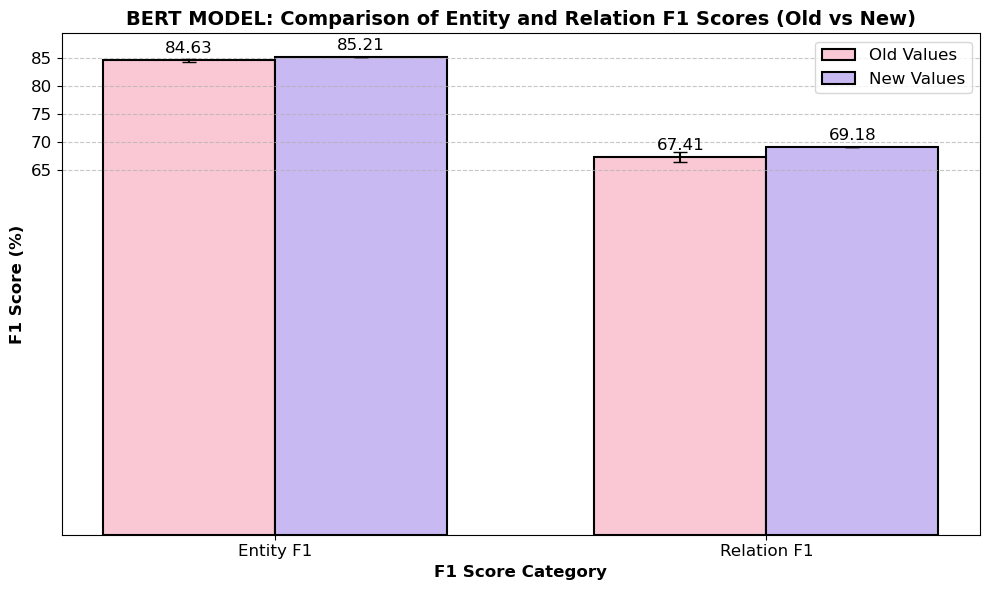

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Old values for F1 scores
old_entity_f1 = 84.63
old_entity_f1_std = 0.25
old_relation_f1 = 67.41
old_relation_f1_std = 0.92

# New values for F1 scores
new_entity_f1 = 85.21
new_entity_f1_std = 0.0
new_relation_f1 = 69.18
new_relation_f1_std = 0.0

# Data for plotting
categories = ['Entity F1', 'Relation F1']
old_values = [old_entity_f1, old_relation_f1]
new_values = [new_entity_f1, new_relation_f1]
old_errors = [old_entity_f1_std, old_relation_f1_std]
new_errors = [new_entity_f1_std, new_relation_f1_std]

# Set the bar width and positions
bar_width = 0.35
index = np.arange(len(categories))

# Plotting the bars
fig, ax = plt.subplots(figsize=(10, 6))

# Choosing light pastel colors from a palette
pastel_pink = '#F9C8D4'   # Light pastel pink
pastel_lavender = '#C9B9F3'  # Light lavender

# Plotting bars with chosen pastel colors
bars1 = ax.bar(index - bar_width/2, old_values, bar_width, yerr=old_errors, label='Old Values', capsize=5, color=pastel_pink, edgecolor='black', linewidth=1.5)
bars2 = ax.bar(index + bar_width/2, new_values, bar_width, yerr=new_errors, label='New Values', capsize=5, color=pastel_lavender, edgecolor='black', linewidth=1.5)

# Adding data labels to the bars
def add_data_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=12, color='black')

add_data_labels(bars1)
add_data_labels(bars2)

# Enhancing the graph appearance
ax.set_xlabel('F1 Score Category', fontsize=12, fontweight='bold')
ax.set_ylabel('F1 Score (%)', fontsize=12, fontweight='bold')
ax.set_title('BERT MODEL: Comparison of Entity and Relation F1 Scores (Old vs New)', fontsize=14, fontweight='bold')
ax.set_xticks(index)
ax.set_xticklabels(categories, fontsize=12)
ax.set_yticks(np.arange(65, 90, 5))
ax.tick_params(axis='y', labelsize=12)
ax.legend(fontsize=12, loc='upper right')

# Adding grid lines for better readability
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

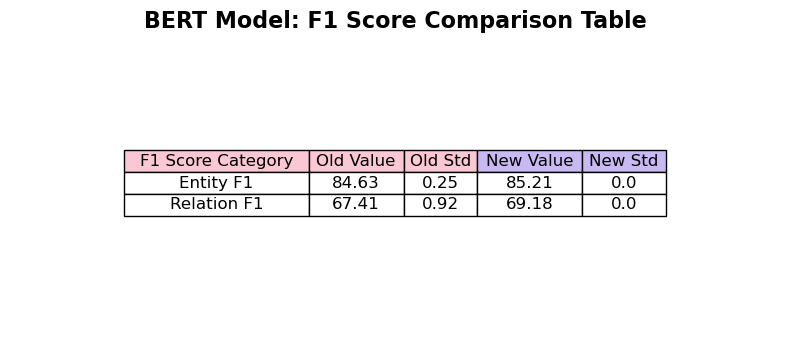

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Old values for F1 scores
old_entity_f1 = 84.63
old_entity_f1_std = 0.25
old_relation_f1 = 67.41
old_relation_f1_std = 0.92

# New values for F1 scores
new_entity_f1 = 85.21
new_entity_f1_std = 0.0
new_relation_f1 = 69.18
new_relation_f1_std = 0.0

# Data for the table
columns = ['F1 Score Category', 'Old Value', 'Old Std', 'New Value', 'New Std']
data = [
    ['Entity F1', old_entity_f1, old_entity_f1_std, new_entity_f1, new_entity_f1_std],
    ['Relation F1', old_relation_f1, old_relation_f1_std, new_relation_f1, new_relation_f1_std]
]

# Create a figure and axis for the table
fig, ax = plt.subplots(figsize=(8, 3.5))  # Make figure shorter to reduce gap

# Hide the axis
ax.axis('off')

# Create the table
table = ax.table(cellText=data, colLabels=columns, loc='center', cellLoc='center', colColours=['#F9C8D4', '#F9C8D4', '#F9C8D4', '#C9B9F3', '#C9B9F3'])

# Formatting the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width([0, 1, 2, 3, 4])  # Adjusting column width
table.scale(1.2, 1.2)  # Scaling for better readability

# Add a title to indicate it's for the BERT model
plt.title('BERT Model: F1 Score Comparison Table', fontsize=16, fontweight='bold')

# Adjust layout to reduce the gap further between title and table
plt.subplots_adjust(top=0.88, bottom=0.12)  # Adjusting 'top' and 'bottom' parameters

# Display the table
plt.tight_layout()
plt.show()